<ipython-input-1-91662af579e0>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='viridis')


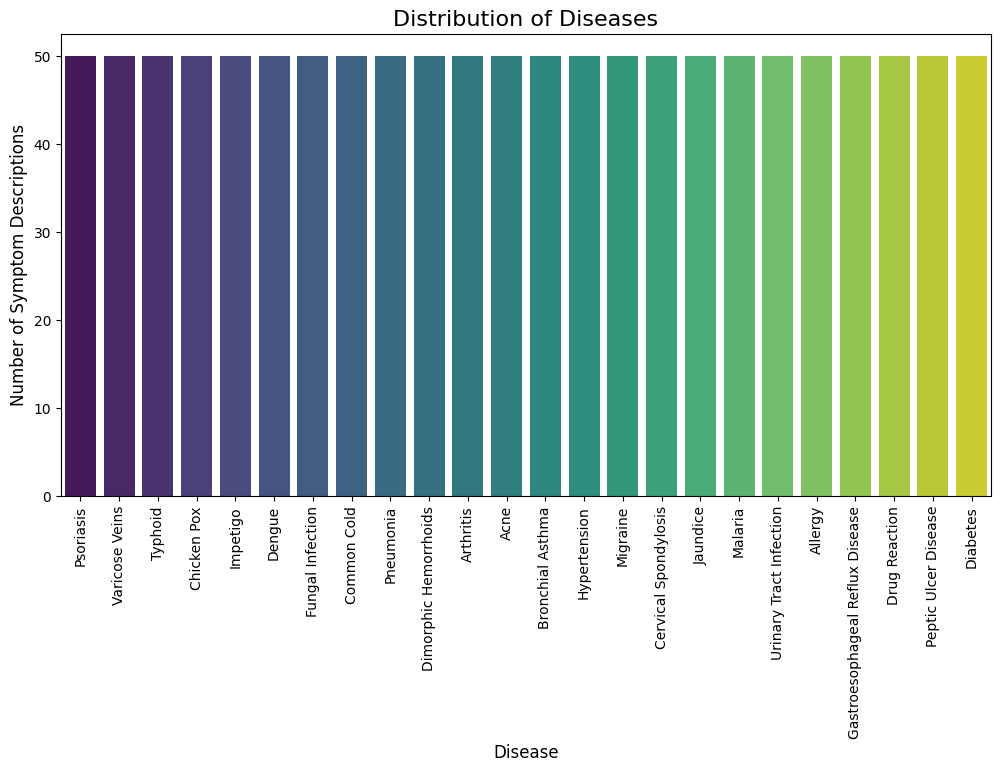

Text for Psoriasis: I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches. My skin has been peeling, especially on my knees, elbows, ...


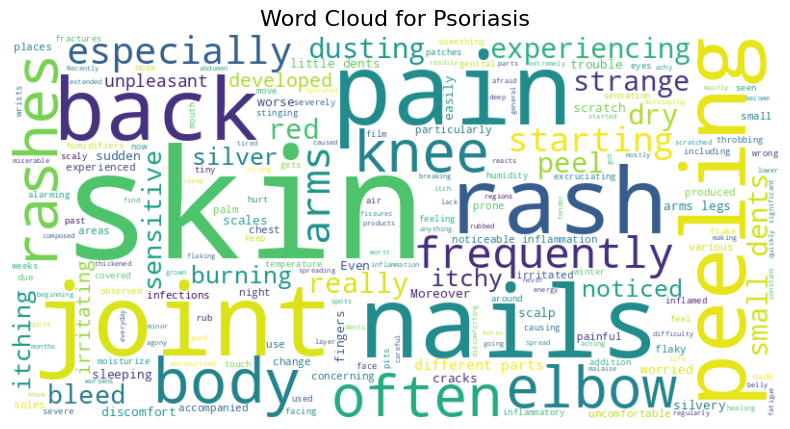

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Best Score: 0.9369047619047619


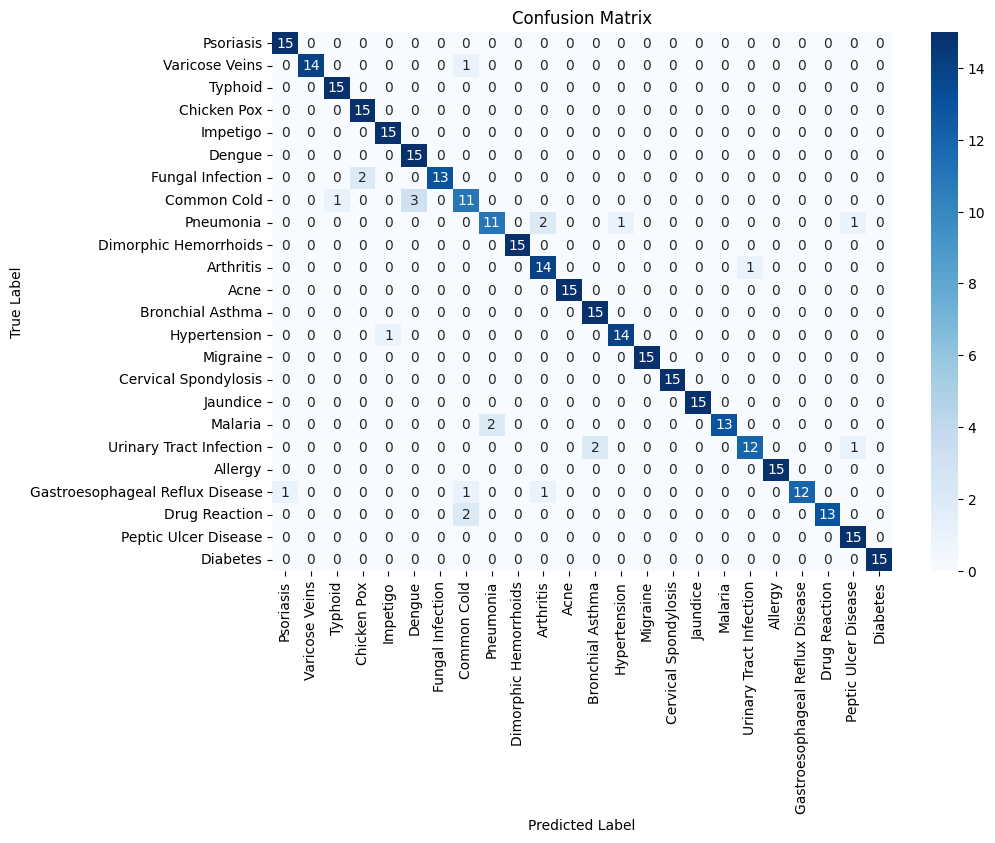

Classification Report:
                                 precision    recall  f1-score   support

                      Psoriasis       0.94      1.00      0.97        15
                 Varicose Veins       1.00      0.93      0.97        15
                        Typhoid       0.94      1.00      0.97        15
                    Chicken Pox       0.88      1.00      0.94        15
                       Impetigo       0.94      1.00      0.97        15
                         Dengue       0.83      1.00      0.91        15
               Fungal Infection       1.00      0.87      0.93        15
                    Common Cold       0.73      0.73      0.73        15
                      Pneumonia       0.85      0.73      0.79        15
          Dimorphic Hemorrhoids       1.00      1.00      1.00        15
                      Arthritis       0.82      0.93      0.88        15
                           Acne       1.00      1.00      1.00        15
               Bronchial As

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
symptom_df = pd.read_csv('/content/Symptom2Disease.csv')
symptom_df['label'] = symptom_df['label'].apply(str.title)
symptom_df.head(10)
symptom_df = symptom_df.drop('Unnamed: 0', axis=1)
symptom_df
# Exploratory Data Analysis
# Distribution Frequency of Diseases

disease_counts = symptom_df['label'].value_counts()

plt.figure(figsize=(12, 6))

sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='viridis')

plt.title('Distribution of Diseases', fontsize=16)
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Number of Symptom Descriptions', fontsize=12)

plt.xticks(rotation=90)

plt.show()
# Word Cloud of Different Diseases

disease = 'Psoriasis'
disease_text = " ".join(symptom_df[symptom_df['label'] == disease]['text'])

print(f"Text for {disease}: {disease_text[:200]}...")  # Print first 200 characters

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(disease_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for word cloud
plt.title(f'Word Cloud for {disease}', fontsize=16)
plt.show()
# Preprocessing
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords

from textblob import TextBlob
import nltk

!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
import string

import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to get the WordNet POS tag from NLTK POS tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Function to lemmatize a single text
def lemmatize_text(text):

    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in tagged_tokens]

    return " ".join(lemmatized_tokens)

# Function to remove common stopwords
def remove_stopwords(text):

    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]

    return " ".join(filtered_words)

# Function to remove punctuations and make texts lowercase
def remove_punctuations_and_lowercase(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Function that encapsulates the other preprocessing techniques
def preprocessing(text):
    removed_stopwords = remove_stopwords(text)
    lemmatized = lemmatize_text(removed_stopwords)
    finalised_text = remove_punctuations_and_lowercase(lemmatized)

    return finalised_text
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

nltk.download('wordnet')
nltk.download('omw-1.4')

symptom_df_w2v = symptom_df.copy()
symptom_df_w2v['text'] = symptom_df['text'].apply(preprocessing)
symptom_df_w2v
# NLP Models Creation
#TF-IDF Vectorization with KNN Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


tfidf_vectorizer = TfidfVectorizer(max_features=1500)

X_train_text, X_test_text, y_train, y_test = train_test_split(symptom_df_w2v['text'],
                                                              symptom_df['label'],
                                                              stratify=symptom_df['label'],
                                                              test_size=0.3,
                                                              random_state=42)

X_train = tfidf_vectorizer.fit_transform(X_train_text)
X_test = tfidf_vectorizer.transform(X_test_text)
# Cross Validation with Grid Search to Determine the Best Model Parameters

param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Number of neighbors to test
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm to compute the nearest neighbors
}

knn_classifier = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn_classifier,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=4,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_knn_classifier = grid_search.best_estimator_
# Predict on test set
y_pred = best_knn_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=symptom_df['label'].unique(),
            yticklabels=symptom_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
report = classification_report(y_test, y_pred, target_names=symptom_df['label'].unique())

# Print classification report
print("Classification Report:")
print(report)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")
symptom = "I have a lot of trouble breathing, my chest feels heavy and i cough mucus"
preprocessed_symptom = preprocessing(symptom)
symptom_tfidf = tfidf_vectorizer.transform([preprocessed_symptom])
predicted_disease = best_knn_classifier.predict(symptom_tfidf)
print(f'Predicted Disease: {predicted_disease[0]}')

**BERT Model**

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch

In [ ]:
# Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(symptom_df['label'])

X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(symptom_df['text'],
                                                       y_encoded,
                                                       stratify=y_encoded,
                                                       test_size=0.3,
                                                       random_state=42)

train_encodings = tokenizer(list(X_train_bert), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_test_bert), truncation=True, padding=True, max_length=128)

In [ ]:
# Create a dataset class that will return the input encodings and labels in the format required by the Trainer class.
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
train_dataset = CustomDataset(train_encodings, y_train_bert.tolist())
test_dataset = CustomDataset(test_encodings, y_test_bert.tolist())

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_score(labels, predictions)
    return {
        'accuracy': accuracy,
    }

In [ ]:
!pip install transformers --upgrade  # Make sure transformers is upgraded
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='/kaggle/working/results',
    num_train_epochs=10,
    learning_rate=4e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    logging_dir='/kaggle/working/logs',
    logging_steps=10,
    # The 'evaluation_strategy' argument is replaced with 'eval_steps' to specify the frequency
    # of the evaluation during training.
    eval_steps=10,  # Evaluate every 10 steps
    # 'evaluation_strategy' was removed since it might not be available in your version
    metric_for_best_model='accuracy',
)

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=24)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: lindachristina025 (lindachristina025-sjce) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
10,3.212700
20,3.212400
30,3.202600
40,3.101900
50,3.017000
60,2.933600
70,2.868900
80,2.622900
90,2.526600
100,2.317300


TrainOutput(global_step=1050, training_loss=0.5044989293529873, metrics={'train_runtime': 250.9304, 'train_samples_per_second': 33.475, 'train_steps_per_second': 4.184, 'total_flos': 336766436697600.0, 'train_loss': 0.5044989293529873, 'epoch': 10.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.12198515236377716,
 'eval_accuracy': 0.9638888888888889,
 'eval_runtime': 1.6744,
 'eval_samples_per_second': 215.004,
 'eval_steps_per_second': 26.875,
 'epoch': 10.0}

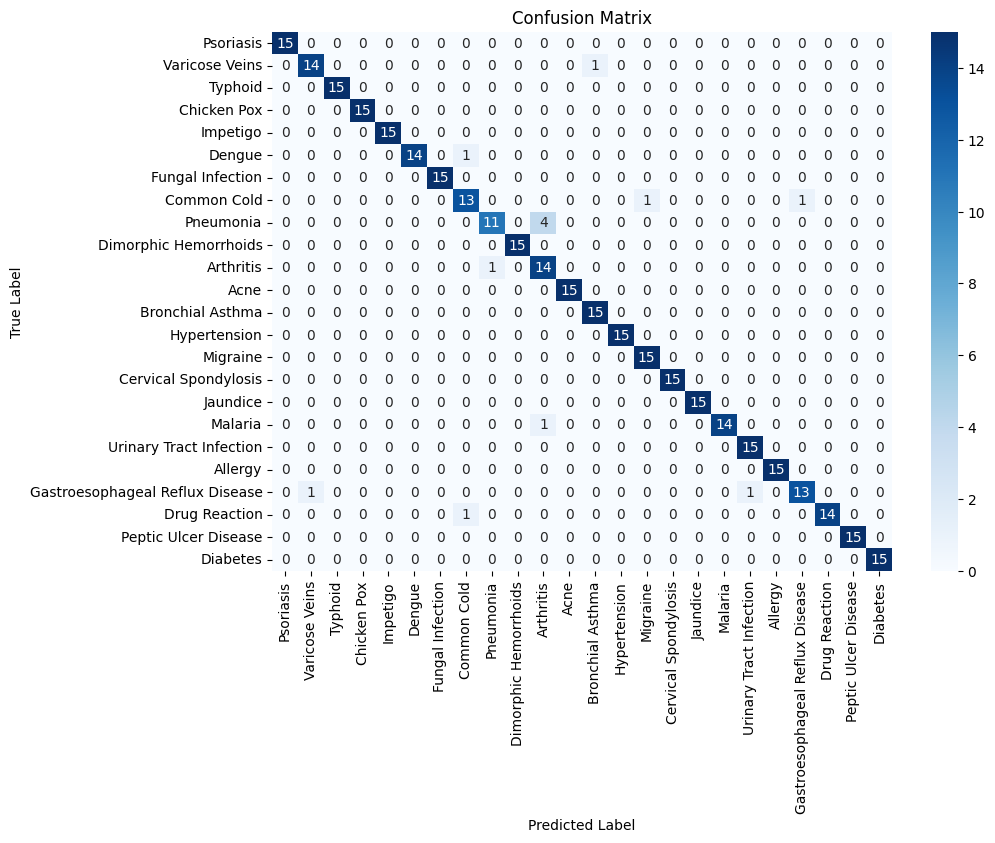

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Get predictions
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=-1)

# Compute confusion matrix
cm = confusion_matrix(y_test_bert, pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=symptom_df['label'].unique(),
            yticklabels=symptom_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate classification report
report = classification_report(y_test_bert, pred_labels, target_names=label_encoder.classes_)

# Print classification report
print("Classification Report:")
print(report)

# Calculate and print accuracy
accuracy = accuracy_score(y_test_bert, pred_labels)
print(f"Accuracy: {accuracy:.5f}")

Classification Report:
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        15
                        Allergy       0.93      0.93      0.93        15
                      Arthritis       1.00      1.00      1.00        15
               Bronchial Asthma       1.00      1.00      1.00        15
           Cervical Spondylosis       1.00      1.00      1.00        15
                    Chicken Pox       1.00      0.93      0.97        15
                    Common Cold       1.00      1.00      1.00        15
                         Dengue       0.87      0.87      0.87        15
                       Diabetes       0.92      0.73      0.81        15
          Dimorphic Hemorrhoids       1.00      1.00      1.00        15
                  Drug Reaction       0.74      0.93      0.82        15
               Fungal Infection       1.00      1.00      1.00        15
Gastroesophageal Reflux Dis

In [ ]:
label_encoder.classes_

array(['Acne', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical Spondylosis', 'Chicken Pox', 'Common Cold', 'Dengue',
       'Diabetes', 'Dimorphic Hemorrhoids', 'Drug Reaction',
       'Fungal Infection', 'Gastroesophageal Reflux Disease',
       'Hypertension', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Peptic Ulcer Disease', 'Pneumonia', 'Psoriasis', 'Typhoid',
       'Urinary Tract Infection', 'Varicose Veins'], dtype=object)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

class_names = label_encoder.classes_

inputs = tokenizer("I have a lot of trouble breathing, my chest feels heavy and i cough mucus", return_tensors="pt", truncation=True, padding=True, max_length=128)
inputs = {key: val.to(device) for key, val in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    pred_label_idx = torch.argmax(logits, dim=-1).item()

predicted_disease = class_names[pred_label_idx]

print(f'Predicted Disease: {predicted_disease}')

Predicted Disease: Pneumonia


In [ ]:
import joblib

# Save the trained model and TF-IDF vectorizer
joblib.dump(best_knn_classifier, 'knn_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [ ]:
# Save BERT model and tokenizer
model.save_pretrained("bert_model")
tokenizer.save_pretrained("bert_model")
joblib.dump(label_encoder, "label_encoder.pkl")


['label_encoder.pkl']